In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ad = pd.read_csv('Social_Network_Ads.csv')

In [3]:
ad.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
ad.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
X = ad[['Gender','Age','EstimatedSalary']]
y = ad['Purchased']

In [7]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


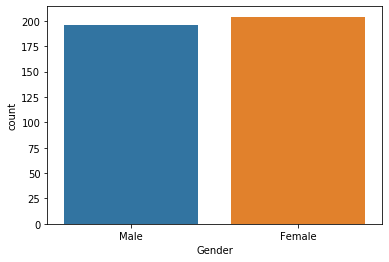

In [6]:
sns.countplot(x='Gender',data=ad)

In [8]:
g = pd.get_dummies(ad['Gender'])

In [9]:
g.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [10]:
ad = pd.concat([ad, g],axis = 1)

In [11]:
ad.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1


In [12]:
ad.drop(['Gender'], axis = 1,inplace = True)

In [13]:
ad.head()

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [14]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [15]:
X = ad[['Age','EstimatedSalary','Female','Male']]
y = ad['Purchased']

In [16]:
X.head()

,Age,EstimatedSalary,Female,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [19]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [21]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred = lr.predict(X_test)

In [23]:
confusion = metrics.confusion_matrix(y_test,y_pred)
print(confusion)

[[56  2]
 [ 5 17]]


In [24]:
accuracy_score(y_test,y_pred)

0.9125

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [27]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [28]:
y_pred = dt.predict(X_test)

In [29]:
confusion = metrics.confusion_matrix(y_test,y_pred)
print(confusion)

[[53  5]
 [ 3 19]]


In [30]:
accuracy_score(y_test,y_pred)

0.9

In [31]:
dg = DecisionTreeClassifier(criterion = 'gini',random_state=0)
dg.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [32]:
y_pred = dg.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred)

0.9

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [35]:
re = RandomForestClassifier(n_estimators =10,criterion='entropy',random_state=0)
re.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [36]:
y_pred = re.predict(X_test)

In [37]:
confusion = metrics.confusion_matrix(y_test,y_pred)
print(confusion)

[[55  3]
 [ 3 19]]


In [38]:
accuracy_score(y_test,y_pred)

0.925

In [39]:
rg = RandomForestClassifier(n_estimators =10,criterion='gini',random_state=0)
rg.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [40]:
y_pred = re.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred)

0.925